<a href="https://colab.research.google.com/github/OmarDalhoom/Extocia/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pip install tensorflow==2.9.1

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:

import os
import zipfile
import tensorflow as tf

def is_valid_image(file_path):
    try:
        _ = tf.io.decode_image(tf.io.read_file(file_path))
        return True
    except:
        return False

image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Open the ZIP file for reading
with zipfile.ZipFile('/content/drive/MyDrive/data2.zip', 'r') as zip_ref:

    # Loop over all files in the ZIP archive
    for info in zip_ref.infolist():

        # Check if the file has an image extension
        if os.path.splitext(info.filename)[1][1:].lower() in image_exts:

            # Extract the file to the temporary directory
            extracted_path = os.path.join('/tmp', info.filename)
            zip_ref.extract(info.filename, '/tmp')

            # Check if the image is valid
            if is_valid_image(extracted_path):
                print(f"Valid image: {extracted_path}")
            else:
                print(f"Invalid image: {extracted_path}")
                os.remove(extracted_path)  # Remove the invalid image

Valid image: /tmp/data2/1.sun burns/05-sunburn-Mistakes-You-Make-After-Getting-Sunburn_553096027-Myibean-760x506.jpg
Valid image: /tmp/data2/1.sun burns/088317c5-a4e5-4d2f-896b-023044e7524e_1140x641.jpg
Valid image: /tmp/data2/1.sun burns/0f8fd16a3a541d4a6da35b801c9a17bb.jpg
Valid image: /tmp/data2/1.sun burns/1_PAY-KNM_APPALLING_SUN_BURN_SIZE_OF_TV_1.jpg
Valid image: /tmp/data2/1.sun burns/150728152349-trae-blister-sunburn-irpt.jpg
Valid image: /tmp/data2/1.sun burns/2_PAY-GRUESOME_SUN_BURN_DN08.jpg
Valid image: /tmp/data2/1.sun burns/20170817_095200.png
Valid image: /tmp/data2/1.sun burns/220px-Sun_burn.JPG.jpg
Valid image: /tmp/data2/1.sun burns/2257-pretty-bad-sunburn.jpg
Valid image: /tmp/data2/1.sun burns/2525373.jpg
Valid image: /tmp/data2/1.sun burns/37.jpg
Valid image: /tmp/data2/1.sun burns/374504f3fc71770fa4ffb4e3a952c7cc.jpg
Valid image: /tmp/data2/1.sun burns/54cac758d6928_-_sunburn-3-0611-xln.jpg
Valid image: /tmp/data2/1.sun burns/5d9701b2a9fa70263090ee915718f86d.jpg
Val

In [ ]:
len(os.listdir('/tmp/data2/1.sun burns'))

213

In [ ]:
pip install split_folders

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
import splitfolders
import os

In [ ]:
# !rm -r /content/output

In [ ]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
os.makedirs('output/test')

In [ ]:
loc = '/tmp/data2'

splitfolders.ratio(loc,output ="output",ratio = (0.80,.1,.1))

Copying files: 1045 files [00:00, 1335.46 files/s]


In [ ]:
def random_image(val_dir,val_class):
    folder = val_dir +val_class
    random_image = random.sample(os.listdir(folder),1)
    img = mping.imread(folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(val_class)
    return img

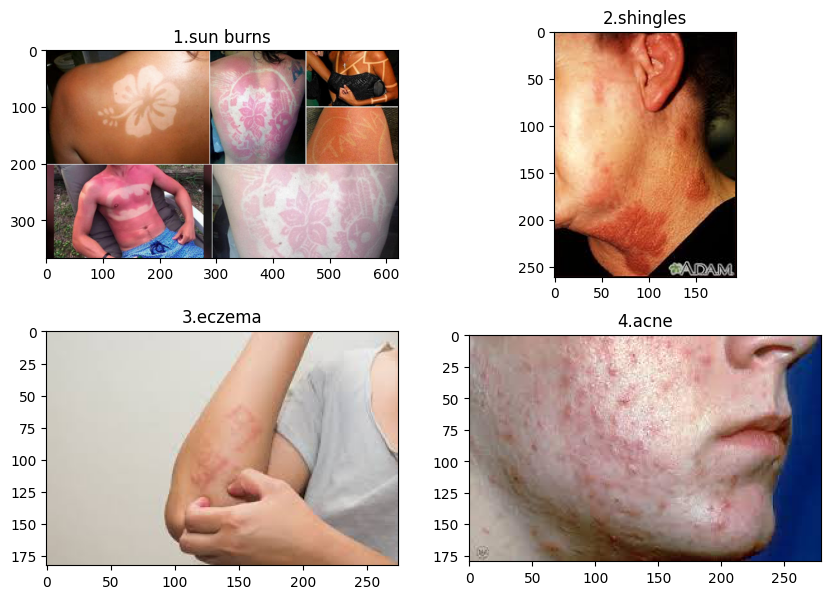

In [ ]:
fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,2,1)
img_1 = random_image(val_dir = "./output/val/",val_class = "1.sun burns")
fig.add_subplot(2,2,2)
img_2 = random_image(val_dir = "./output/val/",val_class = "2.shingles")
fig.add_subplot(2,2,3)
img_3 = random_image(val_dir = "./output/val/",val_class = "3.eczema")
fig.add_subplot(2,2,4)
img4 = random_image(val_dir = "./output/val/",val_class = "4.acne")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "./output/train"
test_dir =  "./output/test"
val_dir = "./output/val"

train_data = image_dataset_from_directory(train_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = True,seed = 42)
test_data = image_dataset_from_directory(test_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)
val_data = image_dataset_from_directory(val_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)

Found 834 files belonging to 5 classes.
Found 109 files belonging to 5 classes.
Found 102 files belonging to 5 classes.


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 6,
                                             min_delta = 0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",factor = 0.2,
                                                patience = 4,min_lr = 1e-7)

In [ ]:
model = tf.keras.applications.EfficientNetB7(include_top=False)
model.trainable = False

258076736/258076736 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_aug = tf.keras.Sequential([
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip("horizontal")
],name = "data_augmentation_layer")

In [ ]:
inputs = layers.Input(shape = (224,224,3),name = "input_layer")
x = data_aug(inputs)
x = model(x)
x = layers.GlobalAvgPool2D(name = "pooling_layer")(x)
# parameter used to specify the size of the output generated from the layer.
x = layers.Dense(32,activation = "relu",kernel_initializer = tf.keras.initializers.he_normal())(x)
outputs = layers.Dense(5, activation="softmax", dtype=tf.float32)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, None, None, 3)    0         
 quential)                                                       
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 pooling_layer (GlobalAverag  (None, 2560)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 32)                81952     
                                                                 
 dense_1 (Dense)             (None, 5)                 165   

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=val_data,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/20
27/27 [==============================] - 54s 757ms/step - loss: 0.8502 - accuracy: 0.7098 - val_loss: 0.5236 - val_accuracy: 0.8137 - lr: 0.0010
Epoch 2/20
27/27 [==============================] - 12s 417ms/step - loss: 0.4103 - accuracy: 0.8633 - val_loss: 0.4288 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 3/20
27/27 [==============================] - 14s 460ms/step - loss: 0.3081 - accuracy: 0.9053 - val_loss: 0.3659 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 4/20
27/27 [==============================] - 13s 441ms/step - loss: 0.2642 - accuracy: 0.9137 - val_loss: 0.3767 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/20
27/27 [==============================] - 14s 483ms/step - loss: 0.2422 - accuracy: 0.9341 - val_loss: 0.3263 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/20
27/27 [==============================] - 13s 449ms/step - loss: 0.2212 - accuracy: 0.9329 - val_loss: 0.3333 - val_accuracy: 0.8725 - lr: 0.0010
Epoch 7/20
27/27 [==============================] - 13s 448ms/st

In [ ]:
print("Testing Accuracy", model.evaluate(test_data))

4/4 [==============================] - 2s 605ms/step - loss: 0.3245 - accuracy: 0.9083
Testing Accuracy [0.3244533836841583, 0.9082568883895874]


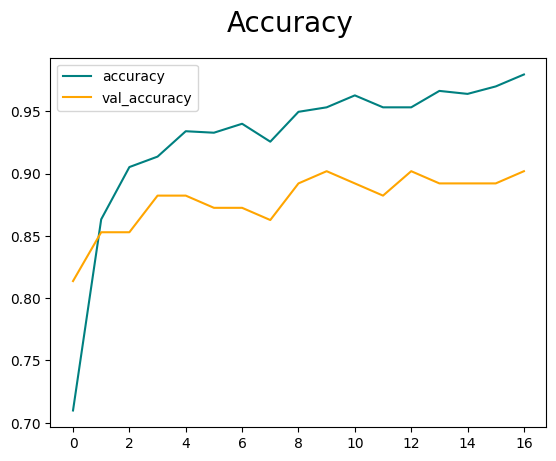

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

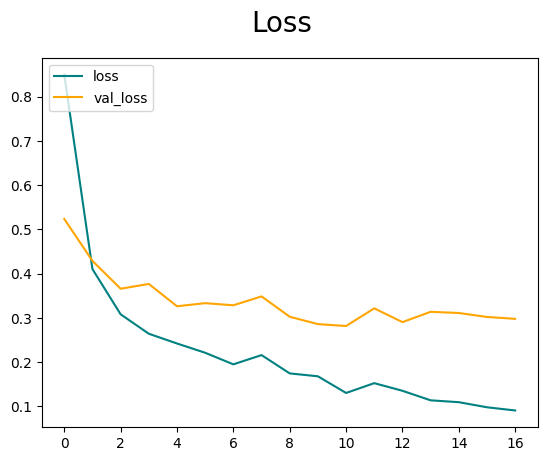

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# model.save("ExtociaModelFolder")

In [ ]:
# !zip -r /content/ExtociaModelFolder.zip /content/ExtociaModelFolder

In [ ]:
model.save_weights('extocia.h5')

In [ ]:
import cv2

In [ ]:
def is_valid_image(file_path):
    try:
        _ = tf.io.decode_image(tf.io.read_file(file_path))
        return True
    except:
        return False

image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Open the ZIP file for reading
with zipfile.ZipFile('/content/drive/MyDrive/testing data.zip', 'r') as zip_ref:

    # Loop over all files in the ZIP archive
    for info in zip_ref.infolist():

        # Check if the file has an image extension
        if os.path.splitext(info.filename)[1][1:].lower() in image_exts:

            # Extract the file to the temporary directory
            extracted_path = os.path.join('/tmp', info.filename)
            zip_ref.extract(info.filename, '/tmp')

            # Check if the image is valid
            if is_valid_image(extracted_path):
                print(f"Valid image: {extracted_path}")
            else:
                print(f"Invalid image: {extracted_path}")
                os.remove(extracted_path)  # Remove the invalid image

Valid image: /tmp/testing data/acne/001.jpg
Valid image: /tmp/testing data/acne/002.jpg
Valid image: /tmp/testing data/acne/003.jpg
Valid image: /tmp/testing data/acne/004.jpg
Valid image: /tmp/testing data/acne/005.jpg
Valid image: /tmp/testing data/acne/006.jpg
Valid image: /tmp/testing data/acne/007.jpg
Valid image: /tmp/testing data/acne/008.jpg
Valid image: /tmp/testing data/acne/009.jpeg
Valid image: /tmp/testing data/acne/010.jpeg
Valid image: /tmp/testing data/acne/011.jpg
Valid image: /tmp/testing data/acne/012.jpg
Valid image: /tmp/testing data/acne/013.jpg
Valid image: /tmp/testing data/acne/014.jpg
Valid image: /tmp/testing data/acne/015.jpg
Valid image: /tmp/testing data/acne/016.jpg
Valid image: /tmp/testing data/acne/017.jpg
Valid image: /tmp/testing data/acne/018.jpg
Valid image: /tmp/testing data/acne/019.jpg
Valid image: /tmp/testing data/acne/020.jpg
Valid image: /tmp/testing data/acne/021.jpg
Valid image: /tmp/testing data/acne/022.jpg
Valid image: /tmp/testing data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

for i in range(1, 36):
    print(f"Processing image {i}...")
    val=model.load_weights('extocia.h5')

    img_name = f"{i:03}"
    print (img_name)

    for ext in ['jpeg', 'jpg']:
     img_path = os.path.join("images", "test", f"/tmp/testing data/acne/{img_name}.{ext}")
     if os.path.isfile(img_path):
       break

    try:
        # Read the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = np.expand_dims(img, axis=0)

        pred = model.predict(img)
        print(pred)

        predicted_class_index = np.argmax(pred)
        predicted_class_index += 1  # Add 1 to match the class numbering in your code (1, 2, 3, 4, 5)
        print("The predicted class index is:", predicted_class_index)


    except Exception as e:
        print(f"Error processing image {img_name}: {e}")

Processing image 1...
001
1/1 [==============================] - 0s 43ms/step
[[9.4484490e-01 5.3017791e-02 1.2867454e-03 3.7123106e-04 4.7932725e-04]]
The predicted class index is: 1
Processing image 2...
002
1/1 [==============================] - 0s 43ms/step
[[3.1471723e-03 7.6450729e-03 4.6315065e-04 9.8861796e-01 1.2669057e-04]]
The predicted class index is: 4
Processing image 3...
003
1/1 [==============================] - 0s 42ms/step
[[0.09460551 0.10268956 0.00113139 0.80045277 0.00112068]]
The predicted class index is: 4
Processing image 4...
004
1/1 [==============================] - 0s 41ms/step
[[4.4054850e-03 1.8681873e-02 1.7255971e-02 9.5948637e-01 1.7025451e-04]]
The predicted class index is: 4
Processing image 5...
005
1/1 [==============================] - 0s 61ms/step
[[1.3463207e-02 1.9763207e-02 1.8845662e-02 9.4780654e-01 1.2140723e-04]]
The predicted class index is: 4
Processing image 6...
006
1/1 [==============================] - 0s 69ms/step
[[6.9055092e-03 1

KeyboardInterrupt: ignored